In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from plsr.analysis import *

In [2]:
from curvefit import DatasetSpectra

2024-07-27 15:23:48.411617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 15:23:48.430931: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 15:23:48.441777: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from boxsers.preprocessing import rubberband_baseline_cor

In [4]:
file_path = '~/data/dataset_565.csv'
domain_path = '~/data/dataset_565_domain.csv'

dataset = DatasetSpectra(file_path, domain_path)
dataset.data

,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,404.9847,...,3996.813,3997.295,3997.777,3998.259,3998.741,3999.224,3999.706,4000.188,HbA1c,Age
0,0.252053,0.253598,0.254435,0.254117,0.252619,0.250394,0.248154,0.246554,0.245932,0.246228,...,0.009200,0.009187,0.009174,0.009163,0.009157,0.009158,0.009164,0.009176,5.12,77.0
1,0.213325,0.213964,0.215273,0.216570,0.217357,0.217480,0.217092,0.216491,0.215936,0.215553,...,0.008720,0.008714,0.008714,0.008721,0.008735,0.008756,0.008780,0.008805,4.32,6.0
2,0.333689,0.334638,0.335916,0.336971,0.337441,0.337332,0.336952,0.336661,0.336639,0.336771,...,0.011127,0.011111,0.011097,0.011085,0.011076,0.011070,0.011067,0.011070,5.40,83.0
3,0.341481,0.342185,0.343449,0.344380,0.344394,0.343455,0.341964,0.340445,0.339238,0.338352,...,0.012086,0.012078,0.012076,0.012077,0.012081,0.012085,0.012091,0.012098,10.20,69.0
4,0.290250,0.293067,0.295698,0.297657,0.298885,0.299738,0.300750,0.302287,0.304330,0.306419,...,0.009711,0.009720,0.009734,0.009752,0.009772,0.009793,0.009814,0.009834,4.55,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0.358854,0.361681,0.364897,0.367508,0.369161,0.370154,0.371139,0.372643,0.374736,0.376910,...,0.009351,0.009337,0.009317,0.009292,0.009268,0.009246,0.009230,0.009220,4.75,5.0
561,0.292636,0.295991,0.301918,0.308828,0.315259,0.320217,0.323289,0.324501,0.324086,0.322351,...,0.011310,0.011289,0.011262,0.011233,0.011204,0.011178,0.011159,0.011150,6.68,73.0
562,0.355229,0.355985,0.358104,0.360095,0.361085,0.361029,0.360479,0.360146,0.360490,0.361533,...,0.009585,0.009604,0.009614,0.009612,0.009599,0.009579,0.009558,0.009540,5.17,58.0
563,0.271155,0.270413,0.270168,0.270236,0.270561,0.271232,0.272381,0.274041,0.276030,0.277946,...,0.010768,0.010774,0.010782,0.010793,0.010805,0.010820,0.010834,0.010846,11.40,48.0


<Axes: >

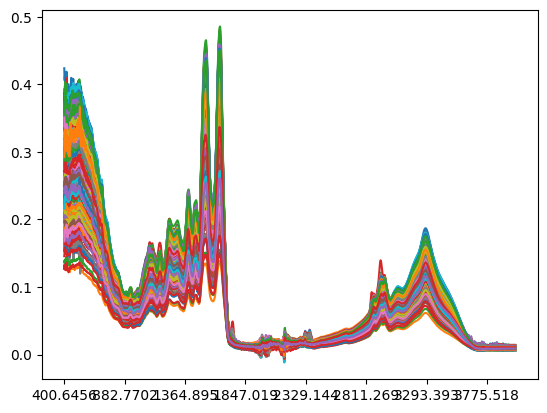

In [5]:
dataset.data.iloc[:, :-2].T.plot(legend=False)

In [6]:
X = dataset.spectra
y = dataset.age
# scaler = StandardScaler()
# y = scaler.fit_transform(y.reshape(-1, 1)).ravel()

<Axes: ylabel='Count'>

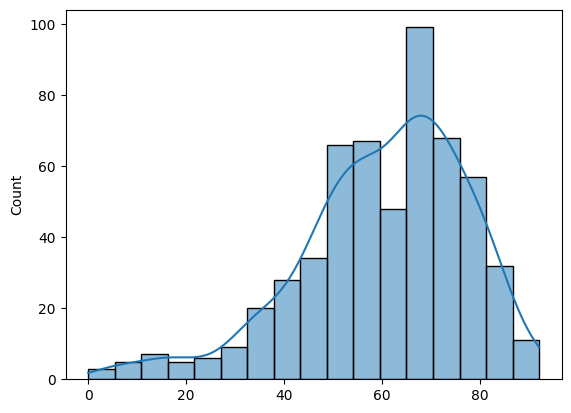

In [7]:
sns.histplot(y, kde=True)

In [8]:
discretizer = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform', subsample=None, random_state=12)
categories = discretizer.fit_transform(y.reshape(-1, 1))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=categories, random_state=44)

Text(0.5, 0, 'HbA1c')

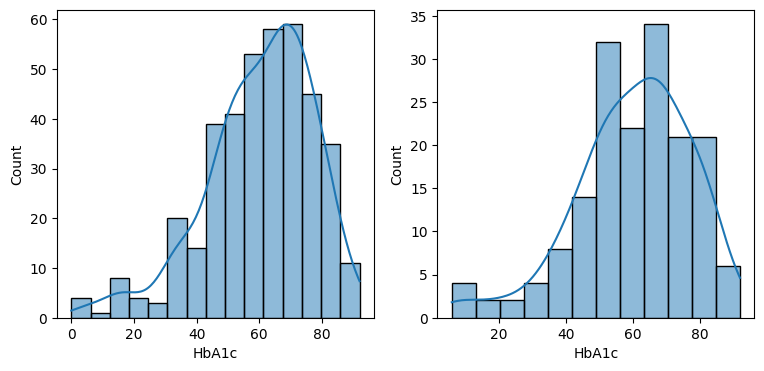

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
sns.histplot(y_train, ax=axs[0], kde=True)
sns.histplot(y_test, ax=axs[1], kde=True)

axs[0].set_xlabel('HbA1c')
axs[1].set_xlabel('HbA1c')

/home/mykola/miniconda3/envs/curvefit/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/mykola/miniconda3/envs/curvefit/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/mykola/miniconda3/envs/curvefit/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/mykola/miniconda3/envs/curvefit/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/mykola/miniconda3/envs/curvefit/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The l

┌──────────────────────────┐
│       FIT RESULTS        │
├──────────────────────────┤
│ RMSE = 15.6623           │
│ R2 = 0.1594              │
│ R = 0.4119               │
│ Number of components = 5 │
└──────────────────────────┘


(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: xlabel='Num of components', ylabel='$R^2$'>,
         <Axes: xlabel='Num of components', ylabel='RMSE'>],
        [<Axes: xlabel='y true', ylabel='y predicted'>,
         <Axes: xlabel='y predicted', ylabel='Residuals'>]], dtype=object))

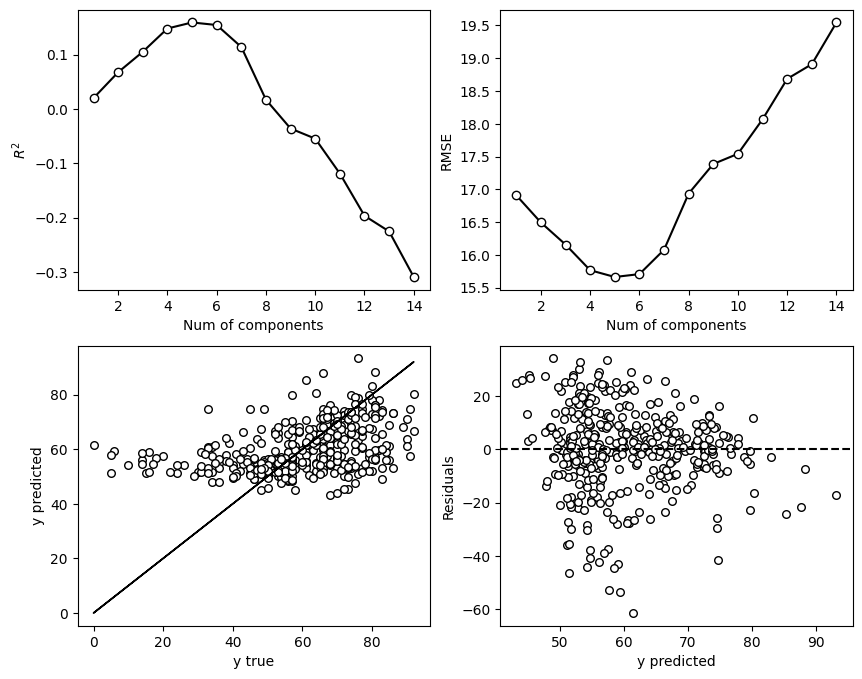

In [11]:
cv = StratifiedKFold(n_splits=10)
plot_number_components(X_train, y_train, number_range=(1, 15), cv=cv)

In [14]:
dataset = DatasetSpectra(file_path, domain_path)
dataset[43]

(array([0.2702946 , 0.2731689 , 0.276142  , ..., 0.01045195, 0.01045338,
        0.01045976]),
 6.3,
 66.0)